# Image segmentation using Expectation-Maximization

## Prerequisites

- NumPy
- Matplotlib
- SciPy

In [3]:
%cd ./pic segmentation

D:\codes\jupyter_prj\pic segmentation


In [1]:
from matplotlib.image import imread
import cv2
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter
from EM import EM
from extractFeature import *

## Read Image and resize

(299, 299, 3)

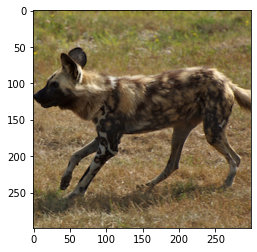

In [2]:
file = 'images/test_image.png'
img = cv2.imread(file)
x,y = img.shape[:-1]
if y > 500:
    x = int(500 * x / y)
    y = 500
img = cv2.resize(img, (y, x), interpolation = cv2.INTER_AREA)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
img.shape

## Preprocess: Smoothing Image and Extract Features

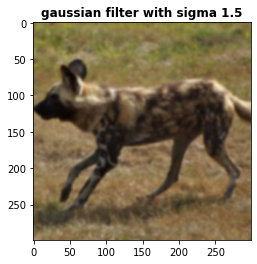

In [27]:
sigma = 1.5
filtered_img = gaussian_filter(img, sigma=(sigma, sigma,0))
plt.title('gaussian filter with sigma %.1f' %sigma, color='black',fontweight=800)
plt.imshow(filtered_img)

# Wenjuan's Part: find the optimal value of weight

feature = norm_and_extract_features(filtered_img,rgb_weight=0.4, texture_weight=0.2)
color_label_table = np.array([[255,165,0], [144,238,144], [28,134,238], [255,255,255], [255,0,255]])


## Expectation-Maximization with Gaussian Mixture Model

previous_likelihood_sum: 1365376.538524
10 iter	 time:0.5	 change:479.14
20 iter	 time:0.8	 change:0.72
30 iter	 time:1.2	 change:0.05
37 iter	 time:1.4	 change:0.01


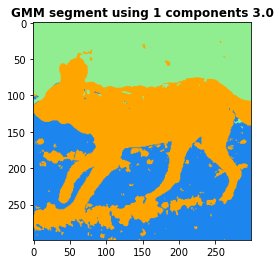

In [28]:
k = 3
em = EM(k=k, verbose=True, max_iter=100, threshold=0.01)
res = em.fit(feature)
clustered_img = color_label_table[res].reshape(img.shape)
plt.title('GMM segment using %d components %.1f' %(sigma, k), color='black',fontweight=800)
plt.imshow(clustered_img)

## Test using kmeans cluster

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

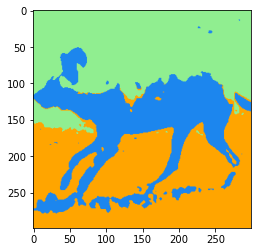

In [5]:
from cluster import kMeanCluster
kmc = kMeanCluster(k)
res = kmc.fit(feature).predict(feature)
clustered_img = color_label_table[res].reshape(img.shape)
plt.imshow(clustered_img)
kmc.label_

## Test using sklearn GMM

Initialization 0
  Iteration 10	 time lapse 0.53072s	 ll change 0.00525
Initialization converged: True	 time lapse 0.83374s	 ll 16.01299


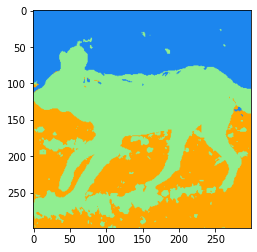

In [14]:
from sklearn.mixture import GaussianMixture
gs = GaussianMixture(n_components=k, random_state=42, verbose=2).fit(feature)
# model.predict predicts the index of aligned component for each pixel
r_pred = gs.predict(feature)
# model.means_ is the mean of the components
pic = color_label_table[r_pred]
pic = pic.reshape(img.shape)
plt.imshow(pic)